Este programa, visa reproduzir a solução do exemplo 3.5.1 do livro (Lewis; Nithiarasu;Seetharamu,2004), cujo título é: Fundamentals of the finite element method for heat and fluid flow.

Sendo assim, é tomado que a temperatura da aleta é igual a 25°C. À vista disso, se a temperatura base for subitamente elevada para uma
temperatura de 100°C, e é mantida nesse valor, é solicitado que seja determinado a distribuição de temperatura na aleta em relação ao tempo. Para isso, é assumido que a capacitade calorífica é 2.42 × 10⁶ W/m³ °C.

Considere também que, o passo de tempo Δt = 0.1s. Desse modo, segue o programa.

In [41]:
# Importar a biblioteca do Firedrake.

try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

In [42]:
import os

os.environ["OMP_NUM_THREADS"] = "1" # Isso é solicitado no manual do Firedrake, para que o mesmo não apresente os alertas que poderão ocorrer com o OMP e a PETSc.


In [43]:
import matplotlib.pyplot as plt
from firedrake import *
import numpy as np

In [44]:
# Para definição da malha com 1 elemento.

num_elements = 1
mesh = IntervalMesh(num_elements, 0.0, 0.02) # O domínio desta malha é [0, 0.02].
x, = mesh.coordinates # Definir x como coordenada da malha.

In [45]:
# Espaço de funções

degree = 1 # Grau do polinômio;
V = FunctionSpace(mesh, "CG", degree) # "CG" denota os elementos finitos Lagrangeanos.

In [46]:
u = TrialFunction(V) # Função candidata à solução;
v = TestFunction(V) # Função peso;
solution = Function(V) # Esta é a variável que armazenará a solução do PV.

In [47]:
# Construção da formulação Variacional:

k_x = Constant(200)
G = Constant(0)
T_a = Constant(25)
q = Constant(0)
h = Constant(120)
P = Constant(0.01)
A = Constant(0.000006)

a = (k_x * A * inner(grad(u), grad(v)) * dx) + (h * P * inner(u, v) * dx)

f = (G * A * v * dx) - (q * P * v * dx) + (h * T_a * P * v * dx)


In [48]:
# Tomaremos as condições de contorno:

c0 = DirichletBC(V, 100, 1) # Condição de contorno do lado esquerdo, representado por 1;

In [49]:
# Solver

solver_parameters = {
    "ksp_type": "preonly",
    "pc_type": "lu" # Pre-condicionador LU.
}

In [50]:
problem = LinearVariationalProblem(a, f, solution, bcs = c0)

solver = LinearVariationalSolver(problem, solver_parameters = solver_parameters)

In [51]:
solver.solve()

In [52]:
solution_values = assemble(solution).dat.data # Resultado escrito em vetor

x_values = assemble(x).dat.data # Coordenadas da malha em vetor.

print(solution_values)

[100.          86.76470588]


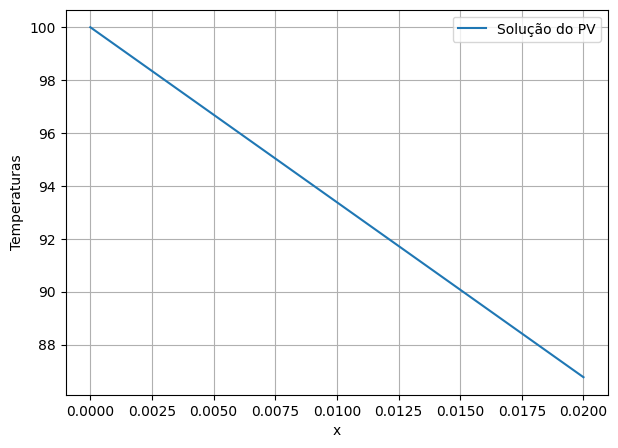

In [53]:
x_values = mesh.coordinates.vector().dat.data


plt.figure(figsize = (7, 5))

plt.plot(x_values, solution_values, "-", label = "Solução do PV")

plt.grid()
plt.legend(loc = "best")


plt.xlabel("x")
plt.ylabel("Temperaturas")

plt.show()